In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import norm

# Read the data


In [2]:
data = pd.read_excel('Titanic_train.xlsx')


In [3]:
data["TicketNumber"] = data["Ticket"].str.extract('(\d{2,})', expand=True)
data["TicketNumber"] = data["TicketNumber"].apply(pd.to_numeric)
data.TicketNumber.fillna(data["TicketNumber"].median(), inplace=True)

In [4]:
# preprocessing

data.Age.fillna(data.Age.mean(),inplace=True)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,17582.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,17582.0


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,TicketNumber
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.170302e+05
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,5.389495e+05
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,5.410000e+02
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.758200e+04
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.758200e+04
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.758200e+04
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.101317e+06


In [6]:
data.set_index("PassengerId", inplace=True)

Text(5, 20, 'Min Value: 0.0')

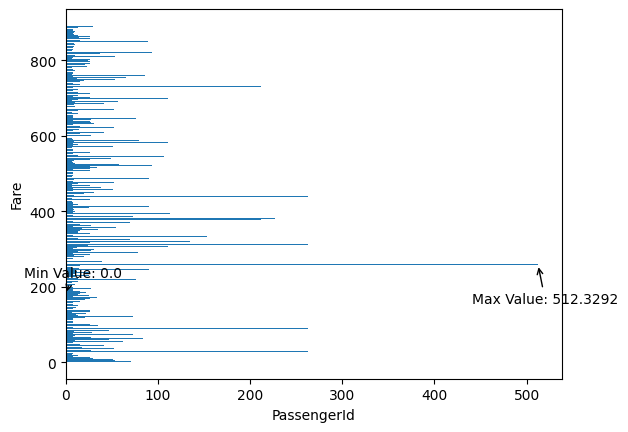

In [7]:
#Fare attribute Bar plot
y = data.Fare
x = data.index
minval = y.min()
maxval = y.max()

plt.barh(x,y)
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.annotate(f"Max Value: {maxval}", xy=(maxval,x[np.argmax(y)]),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Min Value: {minval}", xy=(minval,x[np.argmin(y)]),xytext=(5, 20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

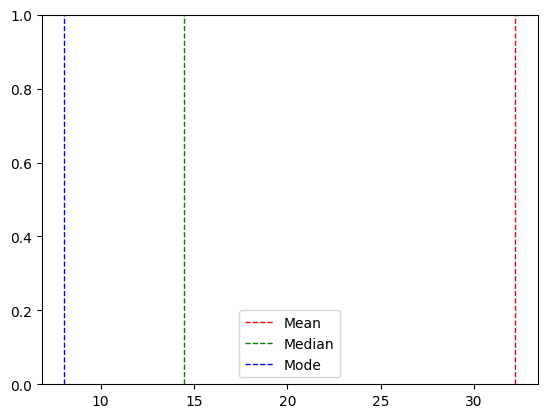

In [8]:
fare_mean = y.mean()
fare_median = y.median()
fare_mode = y.mode()

plt.axvline(fare_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(fare_median, color='g', linestyle='dashed', linewidth=1)
plt.axvline(fare_mode[0], color='b', linestyle='dashed', linewidth=1)

plt.legend(['Mean','Median','Mode'])

Text(0, 0.5, 'Frequency')

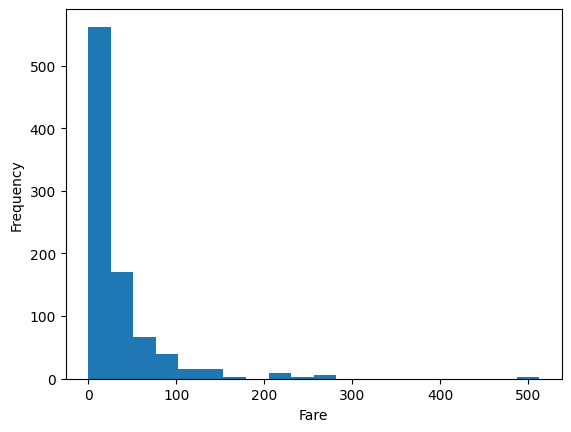

In [9]:
plt.hist(y, bins=20)
plt.xlabel("Fare")
plt.ylabel("Frequency")

Text(0, 0.5, 'Fare')

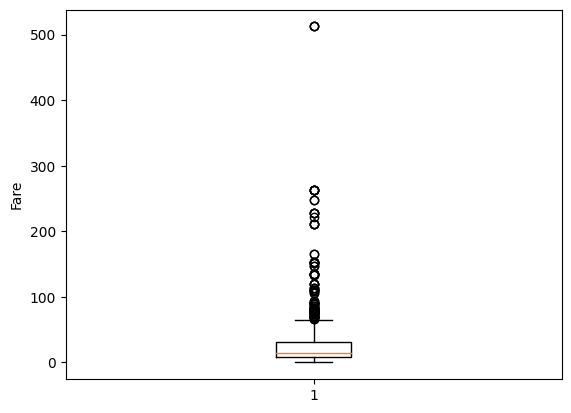

In [10]:
#Fare boxplot
plt.boxplot(y)
plt.ylabel("Fare")


<Axes: xlabel='Fare', ylabel='Density'>

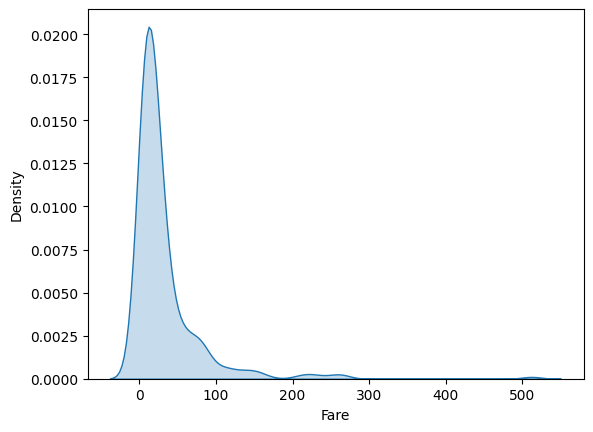

In [11]:
#Fare KDE plot
sns.kdeplot(y, fill=True)

Text(0, 0.5, 'Probability Density')

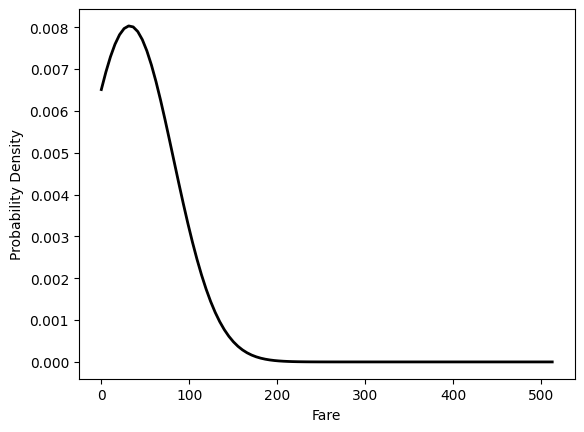

In [12]:
mu, std = norm.fit(y)
xmin, xmax = y.min(), y.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Fare')
plt.ylabel('Probability Density')

0.42


Text(5, -20, 'Min Value: 0.42')

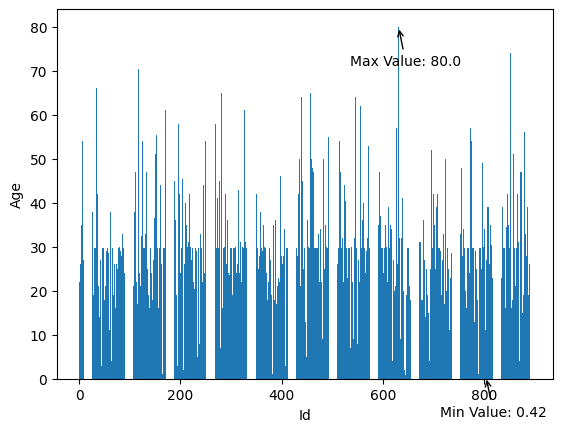

In [13]:
# Age attribute plot
age = data.Age
min_age = age.min()
print(min_age)
max_age = age.max()

plt.bar(age.index,age)
plt.xlabel("Id")
plt.ylabel("Age")
plt.annotate(f"Max Value: {max_age}", xy=(age.index[np.argmax(age)],max_age),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Min Value: {min_age}", xy=(age.index[np.argmin(age)],min_age),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

Text(0, 0.5, 'Frequency')

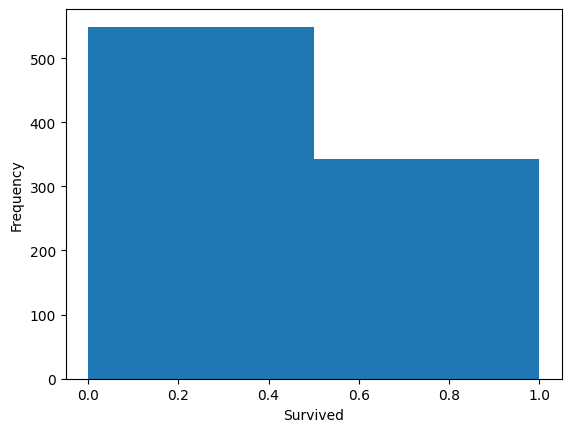

In [14]:
# Survived attribute histogram plot
survived = data.Survived
plt.hist(survived, bins=2)
plt.xlabel("Survived")
plt.ylabel("Frequency")


Text(0, 0.5, 'Survived')

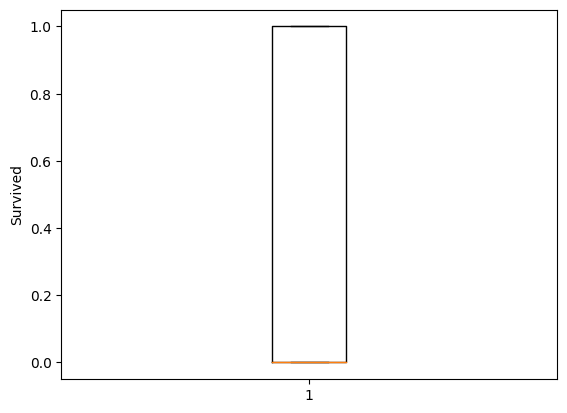

In [15]:
#make boxplot of survived attribute
plt.boxplot(survived)
plt.ylabel("Survived")

<Axes: xlabel='Survived', ylabel='Density'>

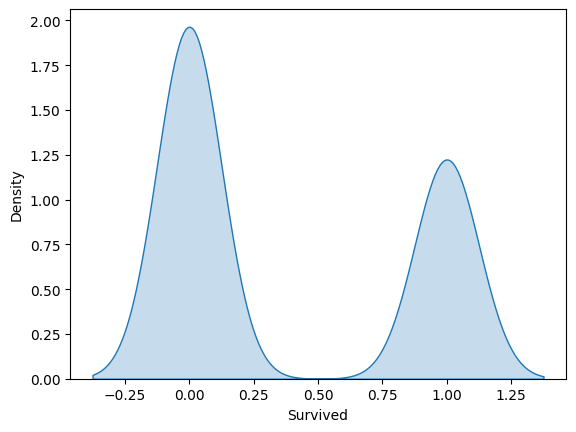

In [16]:
#make kde plot of survived attribute
sns.kdeplot(survived, fill=True)


Text(0, 0.5, 'Probability Density')

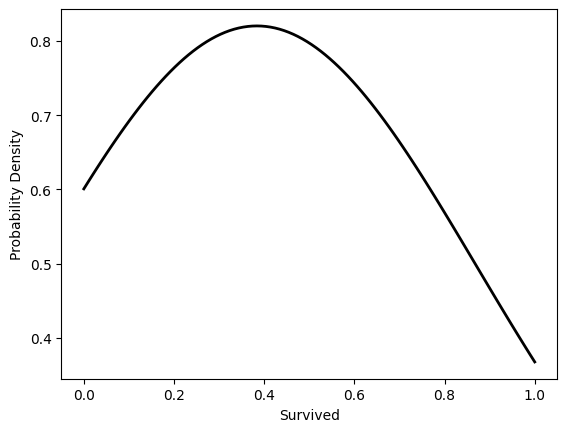

In [17]:
#make pdf plot of survived attribute
mu, std = norm.fit(survived)
xmin, xmax = survived.min(), survived.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Survived')
plt.ylabel('Probability Density')


29.69911764705882 29.69911764705882 29.69911764705882


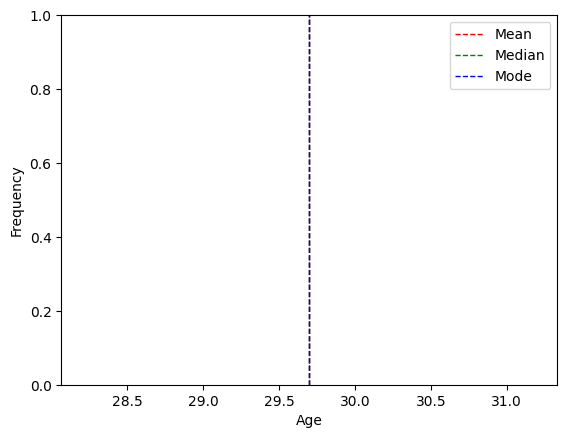

In [18]:
# mean,mode and median visualization of age and fare
age = data.Age
age_mean = age.mean()
age_median = age.median()
age_mode = age.mode()



plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axvline(age_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(age_median, color='g', linestyle='dashed', linewidth=1)
plt.axvline(age_mode[0], color='b', linestyle='dashed', linewidth=1)

plt.legend(['Mean','Median','Mode'])
print(age_mean,age_median,age_mode[0])

(array([0.0126929 , 0.00592335, 0.00423097, 0.00592335, 0.00126929,
        0.0122698 , 0.01650077, 0.02750128, 0.03088606, 0.01777006,
        0.02750128, 0.10112011, 0.01396219, 0.01988554, 0.01607767,
        0.00888503, 0.01184671, 0.00888503, 0.00676955, 0.00592335,
        0.00634645, 0.00296168, 0.00380787, 0.00338477, 0.00169239,
        0.        , 0.00211548, 0.0004231 , 0.        , 0.0004231 ]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

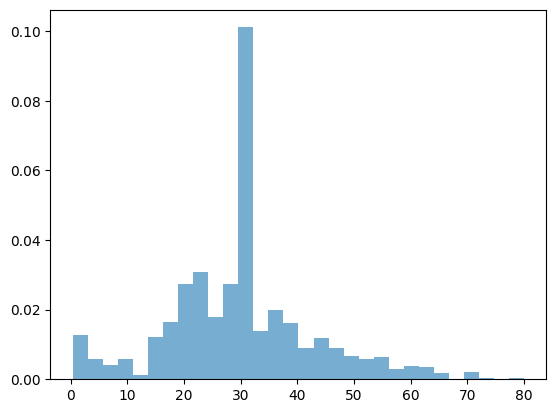

In [19]:
# the histogram of the Age attribute
plt.hist(data['Age'], bins=30, density=True, alpha=0.6)

Text(0, 0.5, 'Age')

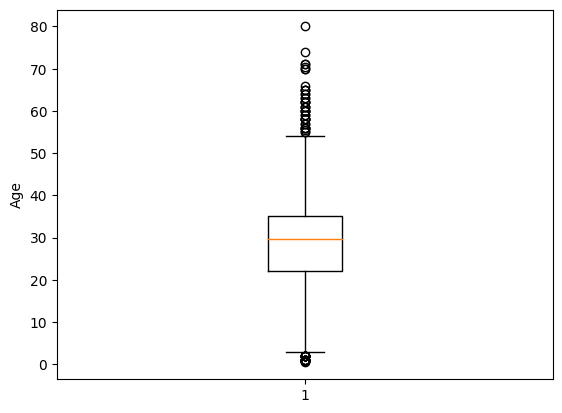

In [20]:
#boxplot of age
plt.boxplot(age)
plt.ylabel("Age")

<Axes: xlabel='Age', ylabel='Density'>

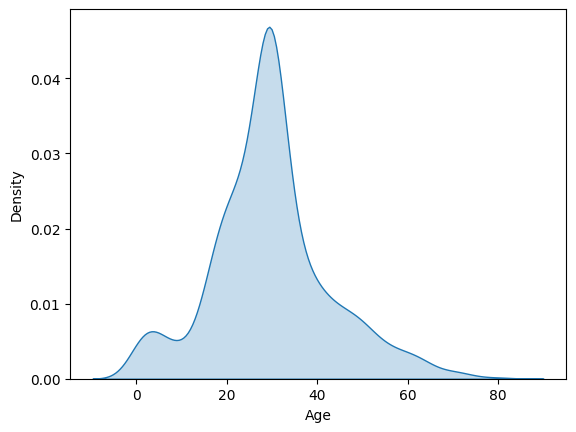

In [21]:
# KDE plot of age
sns.kdeplot(age, fill=True)


0.42 80.0


Text(0, 0.5, 'Probability Density')

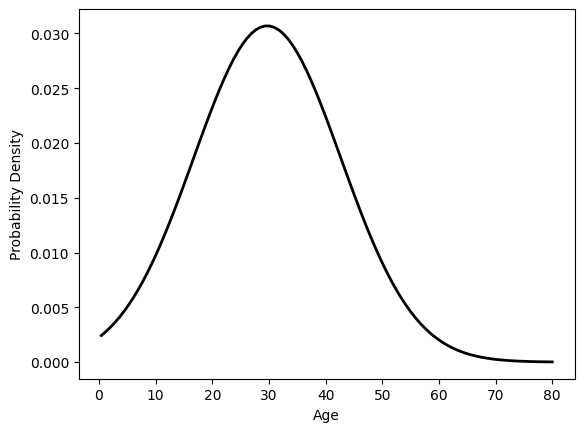

In [22]:
# Uniform Probability Distribution Function
mu, std = norm.fit(data['Age'])
xmin, xmax = data['Age'].min(), data['Age'].max()
print(xmin, xmax)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Probability Density')

Text(215, -25, 'Mode: 0    8.05\nName: Fare, dtype: float64')

C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


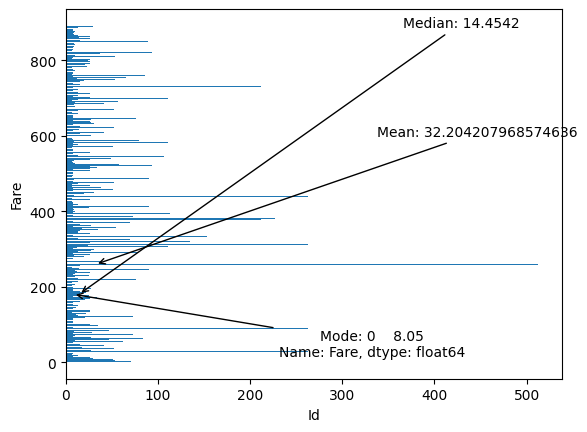

In [23]:
fare = data.Fare
plt.barh(fare.index,fare)
plt.xlabel("Id")
plt.ylabel("Fare")
plt.annotate(f"Mean: {fare_mean}", xy=(fare_mean,fare.index[np.argmax(fare)]),xytext=(275, 100), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Median: {fare_median}", xy=(fare_median,fare.index[np.argmin(fare)]),xytext=(275, 200), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Mode: {fare_mode}", xy=(fare_mode,fare.index[np.argmin(fare)]),xytext=(215, -25), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


In [24]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,21171.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,17599.0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,17582.0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,17582.0
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,17582.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,17582.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,17582.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,17582.0


In [25]:
cat_vars=['Embarked','Sex']
encoder= LabelEncoder()
onehot = OneHotEncoder()

for col in cat_vars:
    data[col] = onehot.fit_transform(data[col].values.reshape(-1,1)).toarray()
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,21171.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,PC 17599,71.2833,C85,1.0,17599.0
3,1,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,3101282.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,113803,53.1000,C123,0.0,17582.0
5,0,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,373450,8.0500,NaN,0.0,17582.0
6,0,3,"Moran, Mr. James",0.0,29.699118,0,0,330877,8.4583,NaN,0.0,17582.0
7,0,1,"McCarthy, Mr. Timothy J",0.0,54.000000,0,0,17463,51.8625,E46,0.0,17582.0
8,0,3,"Palsson, Master. Gosta Leonard",0.0,2.000000,3,1,349909,21.0750,NaN,0.0,17582.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,27.000000,0,2,347742,11.1333,NaN,0.0,17582.0


In [26]:
#encode ticket attribute

data.Ticket = encoder.fit_transform(data.Ticket.astype("str"))
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,523,7.2500,NaN,0.0,21171.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,596,71.2833,C85,1.0,17599.0
3,1,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,669,7.9250,NaN,0.0,3101282.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,49,53.1000,C123,0.0,17582.0
5,0,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,472,8.0500,NaN,0.0,17582.0
6,0,3,"Moran, Mr. James",0.0,29.699118,0,0,275,8.4583,NaN,0.0,17582.0
7,0,1,"McCarthy, Mr. Timothy J",0.0,54.000000,0,0,85,51.8625,E46,0.0,17582.0
8,0,3,"Palsson, Master. Gosta Leonard",0.0,2.000000,3,1,395,21.0750,NaN,0.0,17582.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,27.000000,0,2,344,11.1333,NaN,0.0,17582.0


Text(5, -40, 'Min Value: 0')

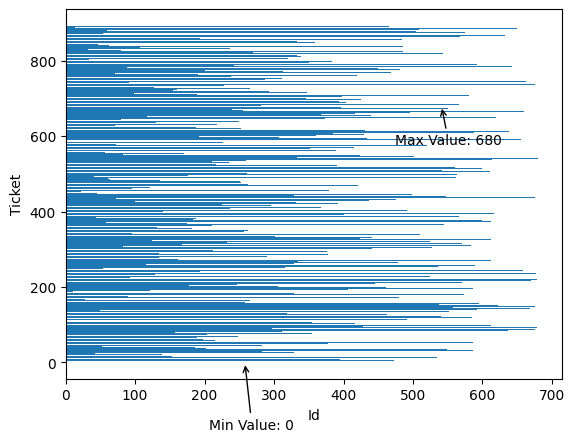

In [27]:
#min and max plots of ticket attribute
ticket = data.Ticket
min_ticket = ticket.min()
max_ticket = ticket.max()

plt.barh(ticket.index,ticket)
plt.xlabel("Id")
plt.ylabel("Ticket")
plt.annotate(f"Max Value: {max_ticket}", xy=(ticket.index[np.argmax(ticket)],max_ticket),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Min Value: {min_ticket}", xy=(ticket.index[np.argmin(ticket)],min_ticket),xytext=(5, -40), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


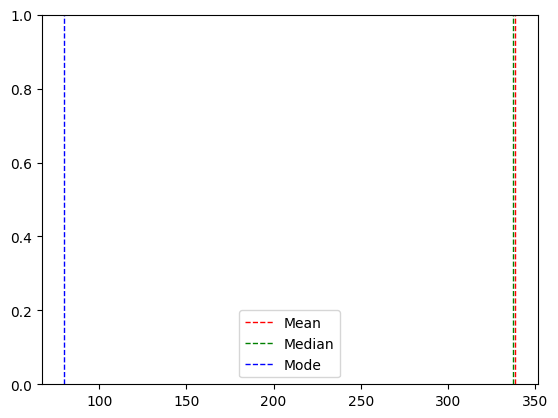

In [28]:
#mean,median and mode of ticket attribute
ticket_mean = ticket.mean()
ticket_median = ticket.median()
ticket_mode = ticket.mode()

plt.axvline(ticket_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(ticket_median, color='g', linestyle='dashed', linewidth=1)
plt.axvline(ticket_mode[0], color='b', linestyle='dashed', linewidth=1)

plt.legend(['Mean','Median','Mode'])


Text(0.5, 0, 'Ticket')

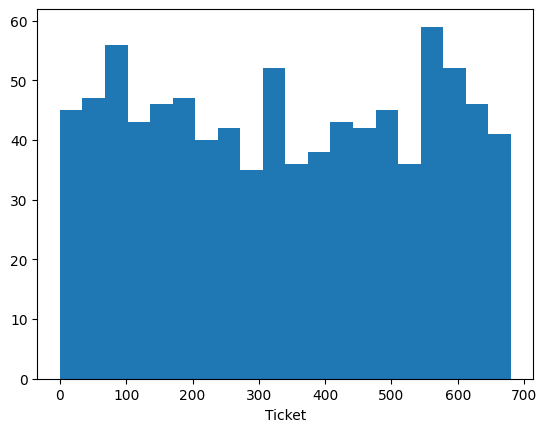

In [29]:
#ticket histogram
plt.hist(ticket, bins=20)
plt.xlabel("Ticket")


Text(0, 0.5, 'Ticket')

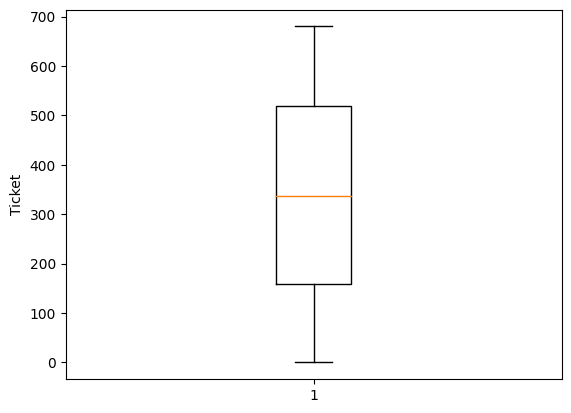

In [30]:
#ticket boxplot

plt.boxplot(ticket)
plt.ylabel("Ticket")


<Axes: xlabel='Ticket', ylabel='Density'>

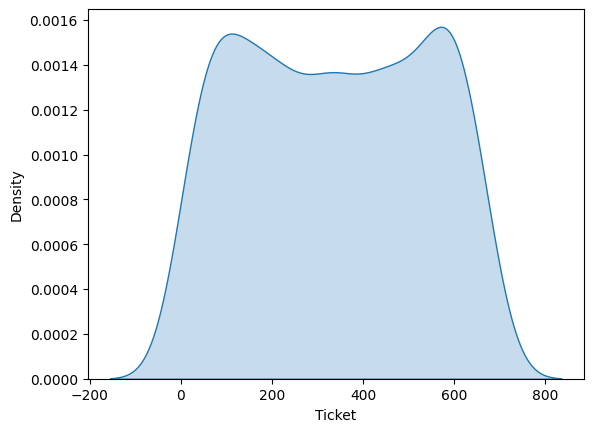

In [31]:
#ticket KDE plot
sns.kdeplot(ticket, fill=True)

Text(0, 0.5, 'Probability Density')

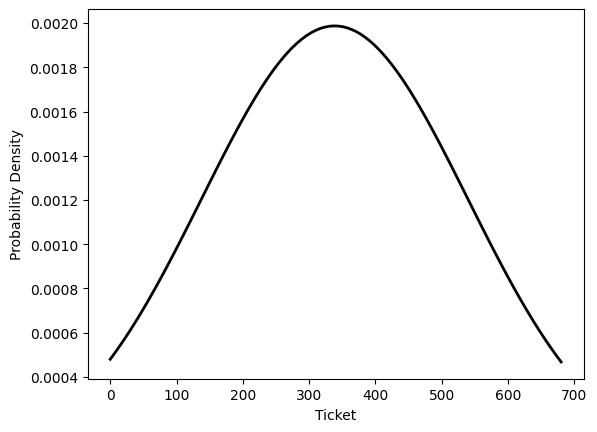

In [32]:
#make pdf of ticket attribute
mu, std = norm.fit(ticket)
xmin, xmax = ticket.min(), ticket.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Ticket')
plt.ylabel('Probability Density')


In [33]:
#apply target encoding to name attribute
data['Name'] = data['Name'].astype('category')
data['Name'] = data['Name'].cat.codes
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
PassengerId,,,,,,,,,,,,
1,0,3,108,0.0,22.000000,1,0,523,7.2500,NaN,0.0,21171.0
2,1,1,190,1.0,38.000000,1,0,596,71.2833,C85,1.0,17599.0
3,1,3,353,1.0,26.000000,0,0,669,7.9250,NaN,0.0,3101282.0
4,1,1,272,1.0,35.000000,1,0,49,53.1000,C123,0.0,17582.0
5,0,3,15,0.0,35.000000,0,0,472,8.0500,NaN,0.0,17582.0
6,0,3,554,0.0,29.699118,0,0,275,8.4583,NaN,0.0,17582.0
7,0,1,515,0.0,54.000000,0,0,85,51.8625,E46,0.0,17582.0
8,0,3,624,0.0,2.000000,3,1,395,21.0750,NaN,0.0,17582.0
9,1,3,412,1.0,27.000000,0,2,344,11.1333,NaN,0.0,17582.0


The mode is 0        0
1        1
2        2
3        3
4        4
      ... 
886    886
887    887
888    888
889    889
890    890
Name: Name, Length: 891, dtype: int16


Text(-100, 100, 'Median: 445.0')

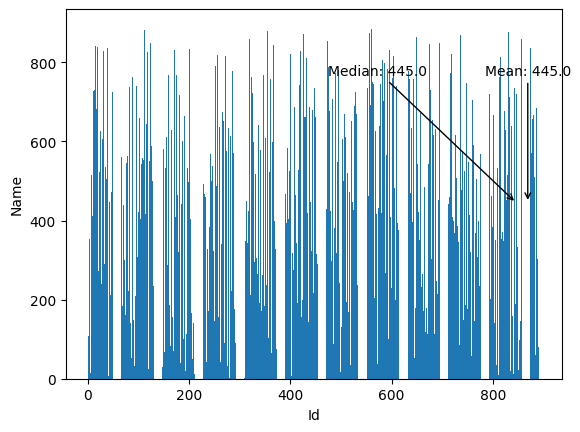

In [34]:
#Apply various plots on name attribute
name = data.Name
name_mean = name.mean()
name_median = name.median()
name_mode = name.mode()
print("The mode is",name_mode)
plt.bar(name.index,name)
plt.xlabel("Id")
plt.ylabel("Name")
plt.annotate(f"Mean: {name_mean}", xy=(name.index[np.argmax(name)],name_mean),xytext=(0, 100), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Median: {name_median}", xy=(name.index[np.argmin(name)],name_median),xytext=(-100, 100), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

Text(5, -20, 'Min Value: 0')

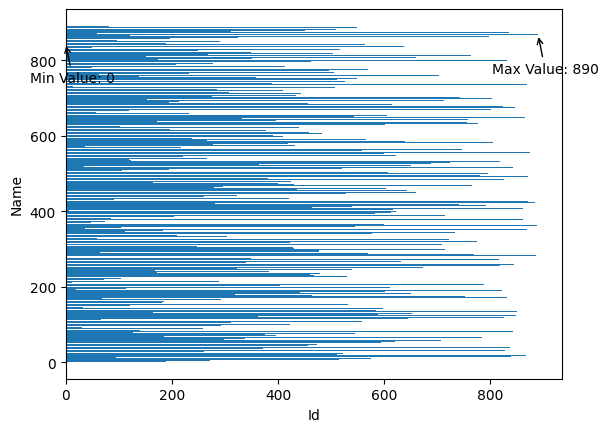

In [35]:
#minimum and maximum plot of name attribute
min_name = name.min()
max_name = name.max()

plt.barh(name.index,name)
plt.xlabel("Id")
plt.ylabel("Name")
plt.annotate(f"Max Value: {max_name}", xy=(max_name,name.index[np.argmax(name)]),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Min Value: {min_name}", xy=(min_name,name.index[np.argmin(name)]),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


Text(0, 0.5, 'Frequency')

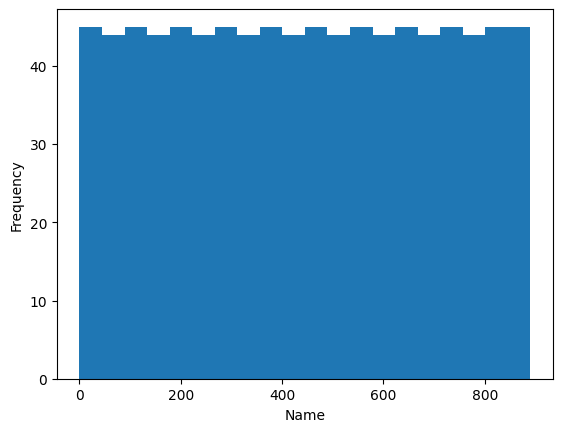

In [36]:
#make histogram of name attribute
plt.hist(name, bins=20)
plt.xlabel("Name")
plt.ylabel("Frequency")

Text(0, 0.5, 'Name')

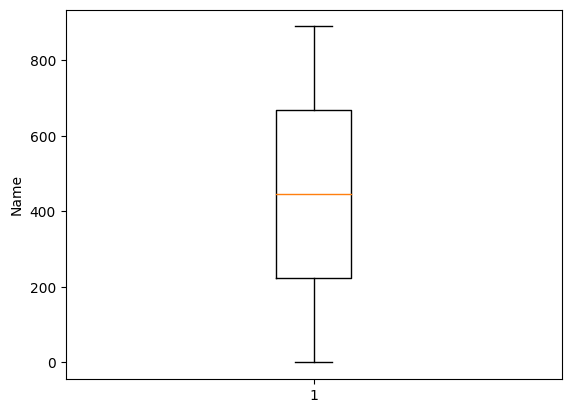

In [37]:
#make boxplot of name attribute
plt.boxplot(name)
plt.ylabel("Name")


<Axes: xlabel='Name', ylabel='Density'>

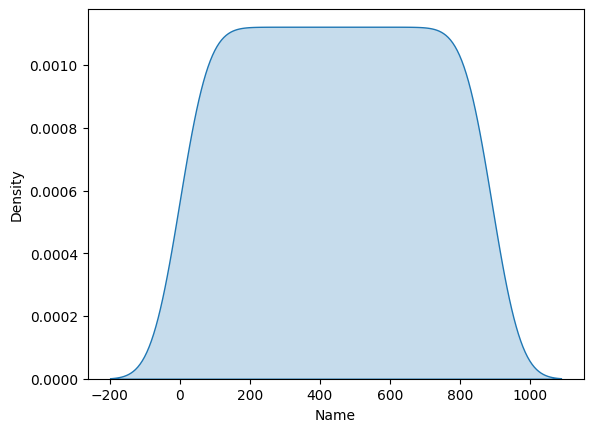

In [38]:
#make kde plot of name attribute
sns.kdeplot(name, fill=True)


Text(0, 0.5, 'Probability Density')

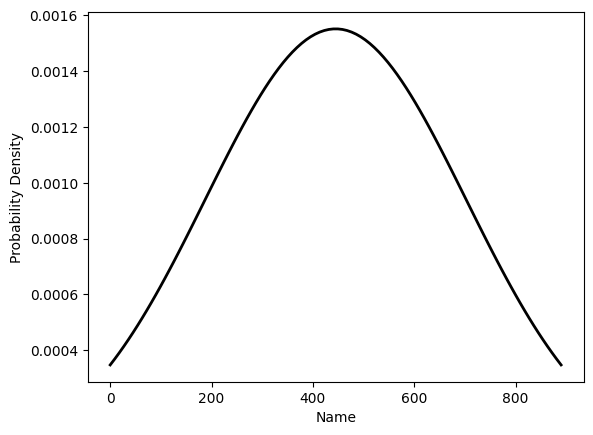

In [39]:
#make pdf of name attribute
mu, std = norm.fit(name)
xmin, xmax = name.min(), name.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Name')
plt.ylabel('Probability Density')


In [40]:
#filling in NA values with the mode of the available values

cabin_mode = data["Cabin"].mode()
data["Cabin"].fillna(cabin_mode, inplace=True)
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [41]:
# use target encoding to encode cabin attribute
data['Cabin'] = data['Cabin'].astype('category')
data['Cabin'] = data['Cabin'].cat.codes
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNumber
PassengerId,,,,,,,,,,,,
1,0,3,108,0.0,22.000000,1,0,523,7.2500,63,0.0,21171.0
2,1,1,190,1.0,38.000000,1,0,596,71.2833,81,1.0,17599.0
3,1,3,353,1.0,26.000000,0,0,669,7.9250,-1,0.0,3101282.0
4,1,1,272,1.0,35.000000,1,0,49,53.1000,55,0.0,17582.0
5,0,3,15,0.0,35.000000,0,0,472,8.0500,-1,0.0,17582.0
6,0,3,554,0.0,29.699118,0,0,275,8.4583,-1,0.0,17582.0
7,0,1,515,0.0,54.000000,0,0,85,51.8625,129,0.0,17582.0
8,0,3,624,0.0,2.000000,3,1,395,21.0750,-1,0.0,17582.0
9,1,3,412,1.0,27.000000,0,2,344,11.1333,-1,0.0,17582.0


Text(5, -40, 'Min Value: -1')

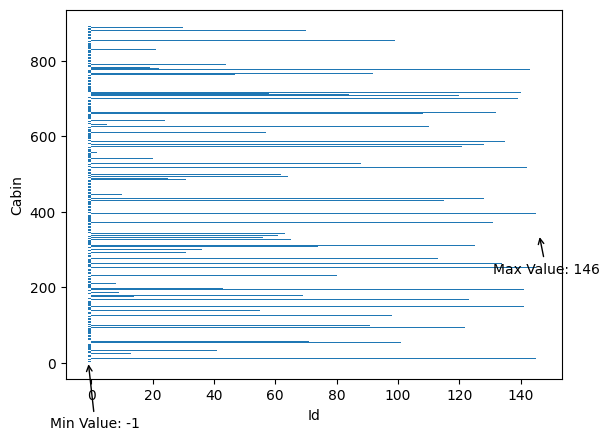

In [42]:
#make minimum and maximum plot of cabin attribute
cabin = data.Cabin
min_cabin = cabin.min()
max_cabin = cabin.max()

plt.barh(cabin.index,cabin)
plt.xlabel("Id")
plt.ylabel("Cabin")
plt.annotate(f"Max Value: {max_cabin}", xy=(max_cabin,cabin.index[np.argmax(cabin)]),xytext=(5, -20), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.annotate(f"Min Value: {min_cabin}", xy=(min_cabin,cabin.index[np.argmin(cabin)]),xytext=(5, -40), textcoords='offset points', ha='center', va='top', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


16.701459034792368 -1.0 -1


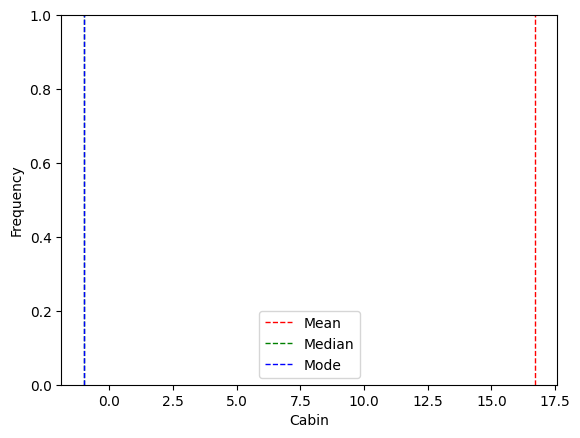

In [43]:
#make mean,median and mode plot of cabin attribute
cabin_mean = cabin.mean()
cabin_median = cabin.median()
cabin_mode = cabin.mode()

plt.xlabel("Cabin")
plt.ylabel("Frequency")
plt.axvline(cabin_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(cabin_median, color='g', linestyle='dashed', linewidth=1)
plt.axvline(cabin_mode[0], color='b', linestyle='dashed', linewidth=1)

plt.legend(['Mean','Median','Mode'])
print(cabin_mean,cabin_median,cabin_mode[0])


Text(0, 0.5, 'Frequency')

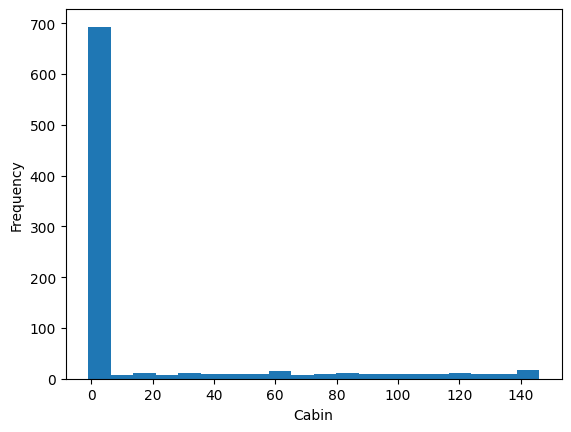

In [44]:
#make histogram of cabin attribute
plt.hist(cabin, bins=20)
plt.xlabel("Cabin")
plt.ylabel("Frequency")



Text(0, 0.5, 'Cabin')

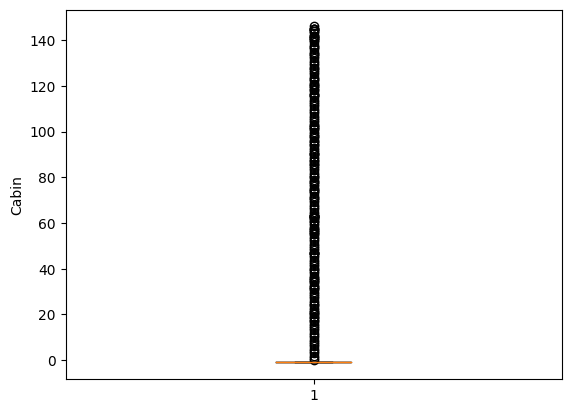

In [45]:
#make boxplot of cabin attribute
plt.boxplot(cabin)
plt.ylabel("Cabin")


<Axes: xlabel='Cabin', ylabel='Density'>

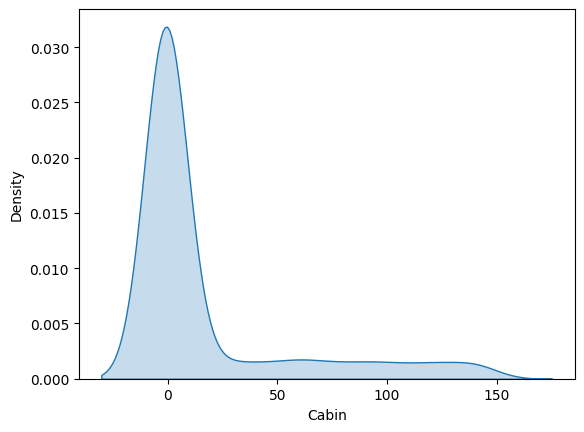

In [46]:
#make kde plot of cabin attribute
sns.kdeplot(cabin, fill=True)


Text(0, 0.5, 'Probability Density')

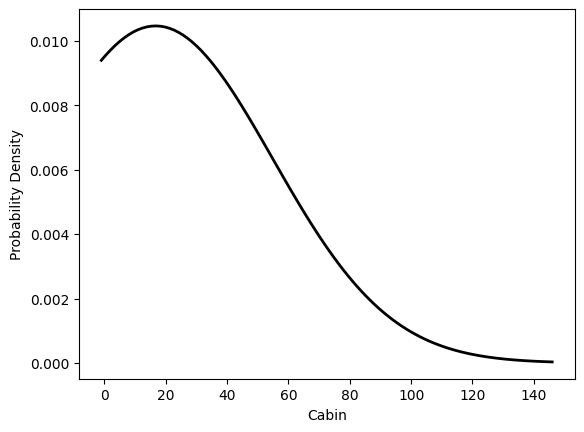

In [47]:
#make pdf of cabin attribute
mu, std = norm.fit(cabin)
xmin, xmax = cabin.min(), cabin.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Cabin')
plt.ylabel('Probability Density')


<Axes: >

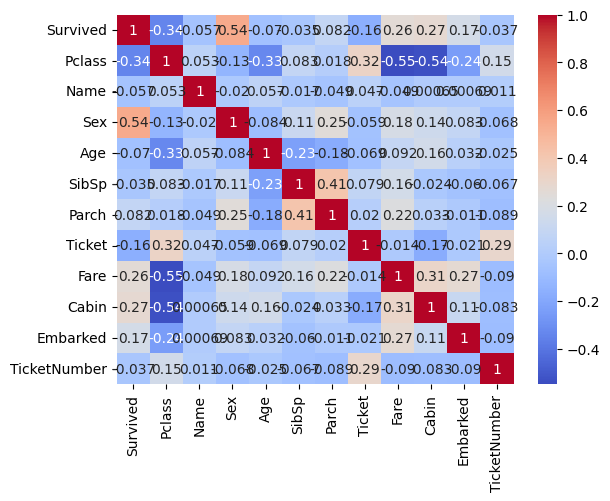

In [51]:
#Correlation matrix of the data
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')